# Multiple Factor Analysis (MFA)

In [1]:
#changement de dossier
import os
os.chdir("d:/Bureau/PythonProject/packages/scientisttools/data/")

#importation des données
import pandas as pd
url = "http://factominer.free.fr/factomethods/datasets/wine.txt"
wine = pd.read_table(url,sep="\t")
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 2EL  to T2  
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Label                          21 non-null     object 
 1   Soil                           21 non-null     object 
 2   Odor.Intensity.before.shaking  21 non-null     float64
 3   Aroma.quality.before.shaking   21 non-null     float64
 4   Fruity.before.shaking          21 non-null     float64
 5   Flower.before.shaking          21 non-null     float64
 6   Spice.before.shaking           21 non-null     float64
 7   Visual.intensity               21 non-null     float64
 8   Nuance                         21 non-null     float64
 9   Surface.feeling                21 non-null     float64
 10  Odor.Intensity                 21 non-null     float64
 11  Quality.of.odour               21 non-null     float64
 12  Fruity                         21 non-null     float

Pour réaliser un analyse factorielle multiple avec scientisttools, nous devons effectuer un traitement de notre jeu de données

### MFA

In [2]:
wine2 = pd.DataFrame(data=wine.values,
                     columns = pd.MultiIndex.from_tuples(
    [
        ("others","Label"),
        ("others","Soil"),
        ("before shaking","Odor.Intensity"),
        ("before shaking","Aroma.quality"),
        ("before shaking","Fruity"),
        ("before shaking","Flower"),
        ("before shaking","Spice"),
        ("vision","Visual.intensity"),
        ("vision","Nuance"),
        ("vision","Surface.feeling"),
        ("after shaking","Odor.intensity"),
        ("after shaking","Quality.of.odour"),
        ("after shaking","Fruity"),
        ("after shaking","Flower"),
        ("after shaking","Spice"),
        ("after shaking","Plante"),
        ("after shaking","Phenolic"),
        ("after shaking","Aroma.intensity"),
        ("after shaking","Aroma.persistency"),
        ("after shaking","Aroma.quality"),
        ("gustation","Attack.intensity"),
        ("gustation","Acidity"),
        ("gustation","Astringency"),
        ("gustation","Alcohol"),
        ("gustation","Balance"),
        ("gustation","Smooth"),
        ("gustation","Bitterness"),
        ("gustation","Intensity"),
        ("gustation","Harmony"),
        ("overall judgement","Overall.quality"),
        ("overall judgement","Typical")
    ]
))
wine2.index= wine.index

In [3]:
groups = wine2.columns.levels[0].drop(["others","overall judgement"]).tolist()
groups

['after shaking', 'before shaking', 'gustation', 'vision']

In [4]:
for g in groups:
    wine2[g] = wine2[g].astype("float")
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 2EL  to T2  
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Label                          21 non-null     object 
 1   Soil                           21 non-null     object 
 2   Odor.Intensity.before.shaking  21 non-null     float64
 3   Aroma.quality.before.shaking   21 non-null     float64
 4   Fruity.before.shaking          21 non-null     float64
 5   Flower.before.shaking          21 non-null     float64
 6   Spice.before.shaking           21 non-null     float64
 7   Visual.intensity               21 non-null     float64
 8   Nuance                         21 non-null     float64
 9   Surface.feeling                21 non-null     float64
 10  Odor.Intensity                 21 non-null     float64
 11  Quality.of.odour               21 non-null     float64
 12  Fruity                         21 non-null     float

In [5]:
from scientisttools.decomposition import MFA

mfa = MFA(n_components=3,
          groups=groups,
          groups_sup=["others","overall judgement"],
          row_labels=wine2.index,
          parallelize=True)

mfa.fit(wine2)

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 2EL  to T2  
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   (after shaking, Odor.intensity)     21 non-null     float64
 1   (after shaking, Quality.of.odour)   21 non-null     float64
 2   (after shaking, Fruity)             21 non-null     float64
 3   (after shaking, Flower)             21 non-null     float64
 4   (after shaking, Spice)              21 non-null     float64
 5   (after shaking, Plante)             21 non-null     float64
 6   (after shaking, Phenolic)           21 non-null     float64
 7   (after shaking, Aroma.intensity)    21 non-null     float64
 8   (after shaking, Aroma.persistency)  21 non-null     float64
 9   (after shaking, Aroma.quality)      21 non-null     float64
 10  (before shaking, Odor.Intensity)    21 non-null     float64
 11  (before shaking, Aroma.quality)     21 non-null

MFA(groups=['after shaking', 'before shaking', 'gustation', 'vision'],
    groups_sup=['others', 'overall judgement'], n_components=3,
    parallelize=True,
    row_labels=Index(['2EL ', '1CHA', '1FON', '1VAU', '1DAM', '2BOU', '1BOI', '3EL ', 'DOM1',
       '1TUR', '4EL ', 'PER1', '2DAM', '1POY', '1ING', '1BEN', '2BEA', '1ROC',
       '2ING', 'T1  ', 'T2  '],
      dtype='object'))

In [6]:
# Valeurs propres
from scientisttools.extractfactor import get_eig
eig = get_eig(mfa)
display(eig)

,eigenvalue,difference,proportion,cumulative
Dim.1,3.461950,2.095182,49.378382,49.378382
Dim.2,1.366768,0.751339,19.494446,68.872829
Dim.3,0.615429,0.243229,8.777969,77.650797


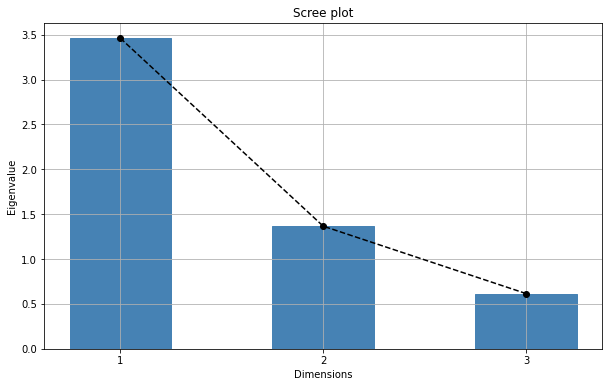

In [7]:
from scientisttools.pyplot import plot_eigenvalues
import matplotlib.pyplot as plt

fig, axe = plt.subplots(figsize=(10,6))
plot_eigenvalues(mfa,choice="eigenvalue",ax=axe)
plt.show()

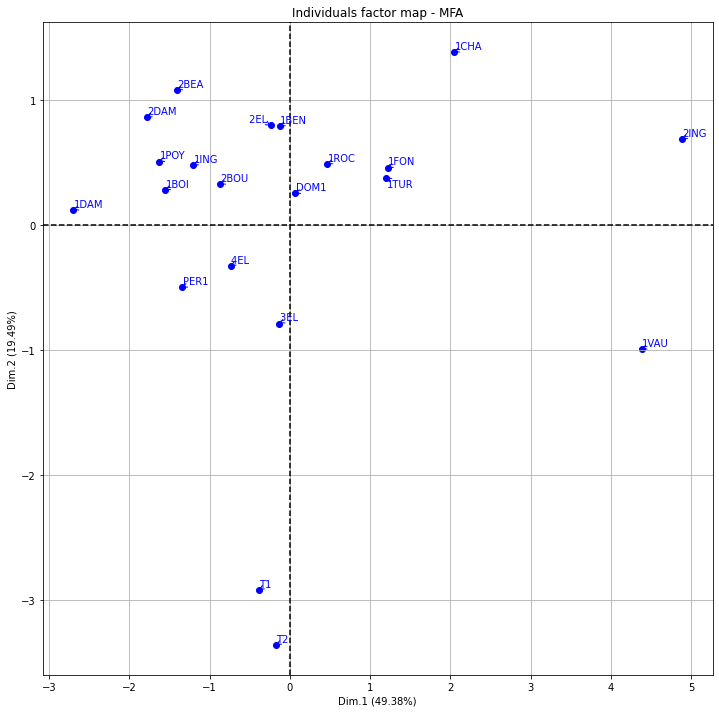

In [8]:
from scientisttools.pyplot import plotMFA

fig, axe = plt.subplots(figsize=(12,12))
plotMFA(mfa,repel=True,ax=axe)
plt.show()

In [9]:
from scientisttools.extractfactor import summaryMFA
summaryMFA(mfa,to_markdown=True)

                     Multiple Factor Analysis - Results                     

Importance of components
|                         |   Dim.1 |   Dim.2 |   Dim.3 |
|:------------------------|--------:|--------:|--------:|
| Variance                |   3.462 |   1.367 |   0.615 |
| Difference              |   2.095 |   0.751 |   0.243 |
| % of var.               |  49.378 |  19.494 |   8.778 |
| Cumulative of % of var. |  49.378 |  68.873 |  77.651 |

Individuals (the 10 first)

|      |   Dim.1 |   Dim.2 |   Dim.3 |
|:-----|--------:|--------:|--------:|
| 2EL  |  -0.239 |   0.797 |  -0.936 |
| 1CHA |   2.045 |   1.383 |  -1.514 |
| 1FON |   1.22  |   0.459 |  -0.062 |
| 1VAU |   4.381 |  -0.995 |   0.033 |
| 1DAM |  -2.696 |   0.12  |   0.69  |
| 2BOU |  -0.869 |   0.326 |  -0.391 |
| 1BOI |  -1.553 |   0.28  |   0.414 |
| 3EL  |  -0.129 |  -0.789 |  -1.858 |
| DOM1 |   0.066 |   0.253 |   0.459 |
| 1TUR |   1.202 |   0.375 |   0.716 |
